# 基于 KMeans 的学校聚类模型（College 数据）

## 知识点
- KMeans 通过最小化样本到其簇中心的平方距离进行聚类；
- 对离散变量（如是否私立）使用均值代表的“中心”可解释性不强。

## 实验目的
1) 使用 KMeans 对学校类型进行聚类；
2) 理解离散变量在聚类中心中的含义与局限；
3) 学习用肘型图选择“合适”的聚类数量。

## 实验步骤概览
1) 读取数据并查看形状与前 5 行；
2) 数据描述、缺失值检查与直方图；
3) 离散变量编码与构造去除离散变量的数据集；
4) 在包含/不包含离散变量两种数据集上分别训练 KMeans 并查看中心；
5) 使用肘型图选择 k 值，重新训练并分析中心；
6) 总结结论。

In [ ]:
# Code 001/002: 读取数据与预览
import pandas as pd

df = pd.read_csv('College.csv', index_col=0)
print('Shape:', df.shape)
df.head()

Shape: (777, 18)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Describe:


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000



Missing values total:
0


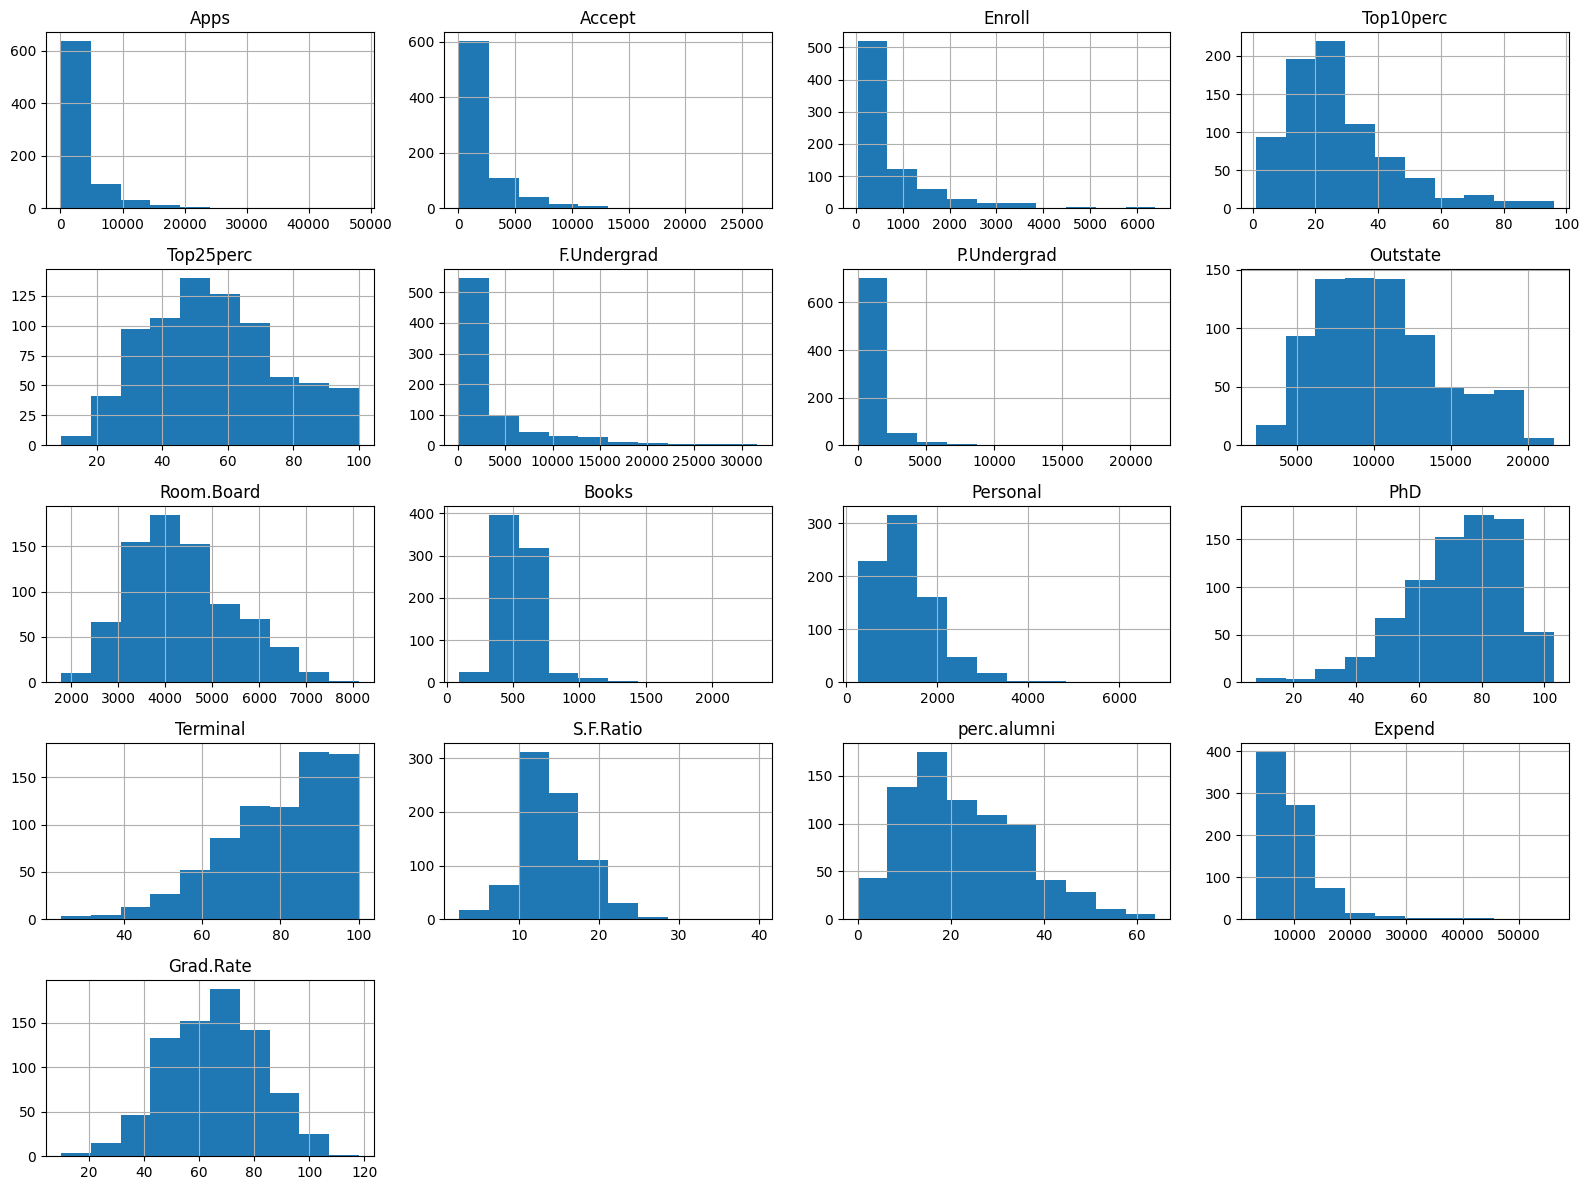

In [2]:
# Code 003/004/005: 描述、缺失值、直方图
print('Describe:')
display(df.describe())

print('\nMissing values total:')
print(df.isnull().sum().sum())

import matplotlib.pyplot as plt
_ = df.hist(figsize=(16, 12))
plt.tight_layout()
plt.show()

In [3]:
# Code 006: 离散变量编码与去除离散变量
print(df['Private'].head(), '\n')
private_tmp = [1 if x == 'Yes' else 0 for x in df['Private']]
df['Private'] = private_tmp
print(df['Private'].head())

# 建立第二份数据集，去掉离散变量
# 注意：题面用的是中文引号，这里统一为英文引号

df_drop = df.drop('Private', axis=1)

Abilene Christian University    Yes
Adelphi University              Yes
Adrian College                  Yes
Agnes Scott College             Yes
Alaska Pacific University       Yes
Name: Private, dtype: object 

Abilene Christian University    1
Adelphi University              1
Adrian College                  1
Agnes Scott College             1
Alaska Pacific University       1
Name: Private, dtype: int64


In [4]:
# Code 007/008/009: 训练 KMeans（k=3）并查看中心
from sklearn.cluster import KMeans

model_not_drop = KMeans(n_clusters=3, n_init=10, random_state=42)
model_drop = KMeans(n_clusters=3, n_init=10, random_state=42)

model_not_drop.fit(df)
model_drop.fit(df_drop)

print('Centers (with Private):')
display(pd.DataFrame(model_not_drop.cluster_centers_, columns=df.columns))

print('\nCenters (without Private):')
display(pd.DataFrame(model_drop.cluster_centers_, columns=df_drop.columns))

Centers (with Private):


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.761062,1701.823009,1236.534513,491.520354,21.819469,49.776991,2226.180531,656.030088,9281.939823,4143.706195,537.015929,1329.796460,67.578761,75.143363,14.636283,20.927434,7830.746903,62.807080
1,0.084337,10621.614458,7300.638554,2939.421687,32.000000,63.469880,15482.506024,3174.554217,8235.855422,4134.879518,594.349398,1888.337349,84.156627,89.554217,16.407229,15.807229,9440.951807,60.506024
2,0.992248,3791.852713,2046.635659,653.937984,49.837209,77.224806,2573.550388,235.829457,16934.325581,5437.279070,574.604651,1035.751938,87.519380,93.333333,10.204651,35.162791,17813.813953,80.286822



Centers (without Private):


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1701.823009,1236.534513,491.520354,21.819469,49.776991,2226.180531,656.030088,9281.939823,4143.706195,537.015929,1329.796460,67.578761,75.143363,14.636283,20.927434,7830.746903,62.807080
1,10621.614458,7300.638554,2939.421687,32.000000,63.469880,15482.506024,3174.554217,8235.855422,4134.879518,594.349398,1888.337349,84.156627,89.554217,16.407229,15.807229,9440.951807,60.506024
2,3791.852713,2046.635659,653.937984,49.837209,77.224806,2573.550388,235.829457,16934.325581,5437.279070,574.604651,1035.751938,87.519380,93.333333,10.204651,35.162791,17813.813953,80.286822


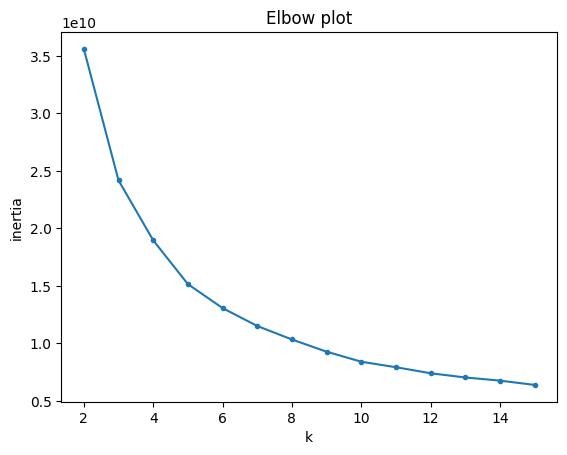

[0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0]


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1192.944444,901.606481,357.932870,20.921296,48.050926,1515.486111,504.923611,9051.983796,4077.888889,529.446759,1311.789352,64.754630,72.509259,14.486806,21.055556,7555.606481,62.291667
1,2490.637931,1674.005747,513.821839,39.385057,68.896552,2049.419540,283.385057,15531.977011,5238.413793,575.293103,1064.672414,83.120690,89.781609,11.501149,32.132184,13482.706897,76.775862
2,5837.264957,4029.470085,1739.598291,22.367521,53.581197,9256.829060,2274.931624,7036.940171,3752.333333,562.905983,1746.683761,78.683761,84.846154,17.200855,14.341880,7509.794872,56.299145
3,9341.750000,3606.250000,1321.950000,76.050000,91.700000,5283.200000,427.200000,18119.750000,6042.750000,576.600000,1255.550000,93.300000,96.800000,6.615000,35.350000,32347.900000,88.950000
4,15110.441176,10125.500000,3883.382353,40.705882,73.676471,19847.823529,3600.588235,9225.352941,4493.764706,607.500000,1772.352941,86.705882,91.764706,15.982353,17.647059,10892.235294,65.588235


In [5]:
# Code 010/011/012: 肘型图选择 k 并重新建模
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 随机划分两份以进行快速 elbow 估计
df_tr, df_ts, df_drop_tr, df_drop_ts = train_test_split(df, df_drop, test_size=0.25, random_state=42)

x, y = [], []
for i in range(2, 16):
    km = KMeans(n_clusters=i, n_init=10, random_state=42).fit(df_tr)
    y.append(km.inertia_)
    x.append(i)

plt.plot(x, y, '.-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow plot')
plt.show()

# 选择 k=5 重新建模
model = KMeans(n_clusters=5, n_init=10, random_state=42)
model.fit(df_drop)
cluster_pred = model.predict(df_drop)
print(cluster_pred[:20])

# 查看聚类中心
pd.DataFrame(model.cluster_centers_, columns=df_drop.columns)

## 实验结论

- KMeans 对离散变量（如 Private）给出的“中心”是数值均值，解释性较弱；
- 肘型图可用于选择聚类数，拐点附近的 k 值可作为候选；
- 聚类数的最终选择需结合业务理解与后续验证（如簇稳定性、可分性、可解释性）。